**TANPA SAMPLING**

Classification Report:
               precision    recall  f1-score   support

    Negative       0.83      0.90      0.86       124
    Positive       0.81      0.71      0.76        76

    accuracy                           0.82       200
   macro avg       0.82      0.80      0.81       200
weighted avg       0.82      0.82      0.82       200



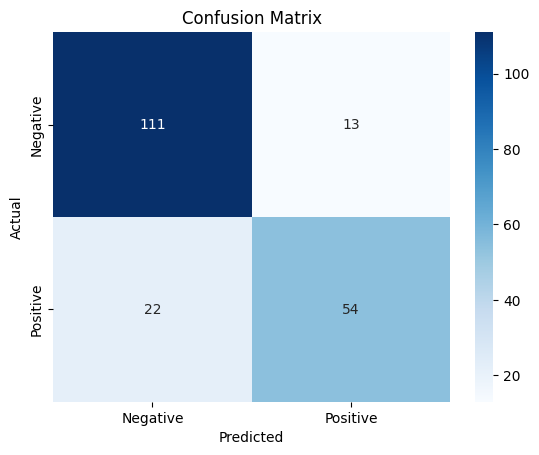

Accuracy: 82.50%


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()


# 1. Baca dataset Anda
df = pd.read_csv('../dataset/Hasil.csv')
df.drop(df.tail(3).index, inplace=True)

df['polarity']  = Encoder.fit_transform(df['polarity'] )
# 4. Lakukan ekstraksi fitur teks dengan TF-IDF sebelum splitting data
tfidf_vectorizer = TfidfVectorizer(max_features=2000, max_df=0.75, min_df=5)  # Tambahkan max_df dan min_df
X_tfidf = tfidf_vectorizer.fit_transform(df['content_preprocessing'])

# 3. Bagi dataset menjadi data pelatihan (training) dan data pengujian (testing) setelah ekstraksi fitur TF-IDF
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['polarity'], test_size=0.2,random_state=42)

svm_sebelum_smote = SVC(kernel='linear', probability=True)

# 5. Latih model SVM
svm_sebelum_smote.fit(X_train, y_train)


# 9. Hitung dan tampilkan precision, recall, f1-score, dan support
y_pred = svm_sebelum_smote.predict(X_test)
classification_rep = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print("Classification Report:\n", classification_rep)

plt.show()

# 9. Tampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 10. Hitung dan tampilkan akurasi
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))

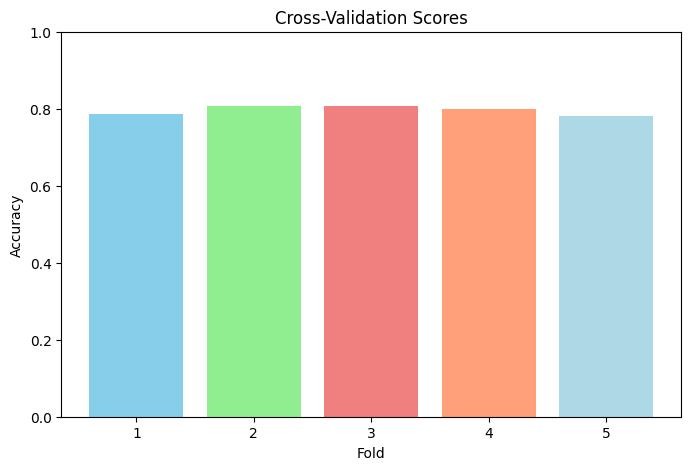

Mean CV accuracy: 79.62%


In [11]:
from sklearn.model_selection import train_test_split, cross_val_score

cv_scores = cross_val_score(svm_sebelum_smote, X_train, y_train, cv=5)
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightblue']

plt.figure(figsize=(8, 5))
for i in range(len(cv_scores)):
    plt.bar(i+1, cv_scores[i], color=colors[i % len(colors)])
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.ylim(0, 1)
plt.show()

print("Mean CV accuracy: {:.2f}%".format(cv_scores.mean() * 100))

cv_scores_df = pd.DataFrame({"K/Fold": range(1, len(cv_scores) + 1), "Accuracy": cv_scores})
cv_scores_df

cv_scores_df.to_csv('../eval/kfold_sebelum_smote.csv', index=True)

## SMOTE

Classification Report:
               precision    recall  f1-score   support

    Negative       0.89      0.86      0.87       138
    Positive       0.82      0.87      0.84       106

    accuracy                           0.86       244
   macro avg       0.86      0.86      0.86       244
weighted avg       0.86      0.86      0.86       244



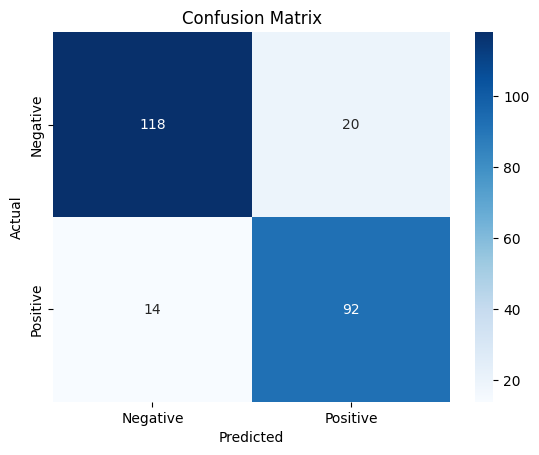

Accuracy: 86.07%


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 1. Baca dataset Anda
df = pd.read_csv('../dataset/Hasil.csv')
df.drop(df.tail(3).index, inplace=True)

sentiment_count = df['polarity'].value_counts()

from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
df['polarity']  = Encoder.fit_transform(df['polarity'] )
df['content_preprocessing']=df['content_preprocessing'].apply(lambda x: ' '.join(eval(x)))

tfidf_vectorizer = TfidfVectorizer(max_features=2000, max_df=0.75, min_df=5)

X=tfidf_vectorizer.fit_transform(df['content_preprocessing'])
y=df['polarity']

smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X, y)


# 3. Bagi dataset menjadi data pelatihan (training) dan data pengujian (testing) setelah ekstraksi fitur TF-IDF
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2,random_state=42)

# 4. Latih model SVM
svm_sesudah_smote = SVC(kernel='linear', probability=True)
svm_sesudah_smote.fit(X_train, y_train)

# 5. Hitung probabilitas untuk masing-masing kelas
y_score = svm_sesudah_smote.decision_function(X_test)

# 8. Hitung dan tampilkan precision, recall, f1-score, dan support
y_pred = svm_sesudah_smote.predict(X_test)
classification_rep = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print("Classification Report:\n", classification_rep)

# 9. Tampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 10. Hitung dan tampilkan akurasi
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))


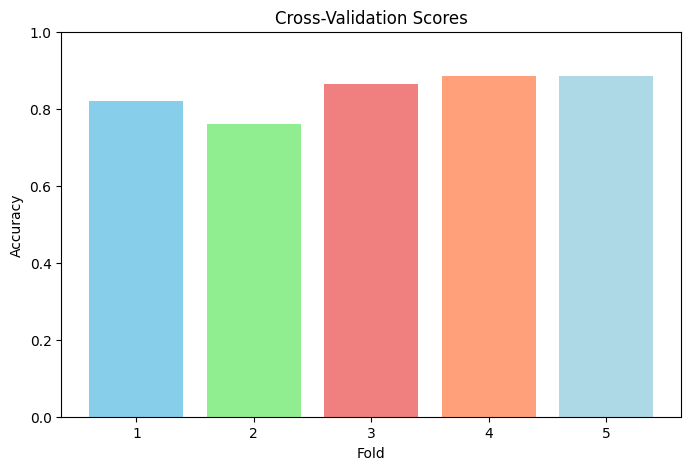

Mean CV accuracy: 84.29%


In [13]:
from sklearn.model_selection import train_test_split, cross_val_score

cv_scores = cross_val_score(svm_sesudah_smote, X_resampled, y_resampled, cv=5)
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightblue']

plt.figure(figsize=(8, 5))
for i in range(len(cv_scores)):
    plt.bar(i+1, cv_scores[i], color=colors[i % len(colors)])
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.ylim(0, 1)
plt.show()

print("Mean CV accuracy: {:.2f}%".format(cv_scores.mean() * 100))

cv_scores_df = pd.DataFrame({"K/Fold": range(1, len(cv_scores) + 1), "Accuracy": cv_scores})
cv_scores_df
cv_scores_df.to_csv('../eval/kfold_sesudah_smote.csv', index=True)

In [ ]:
# Save the model to a file
import joblib
joblib.dump(svm_sebelum_smote, 'svm_sebelum_smote.joblib')

joblib.dump(svm_sesudah_smote, 'svm_sesudah_smote.joblib')
